# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('loan_data.csv')

# Quick overview
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


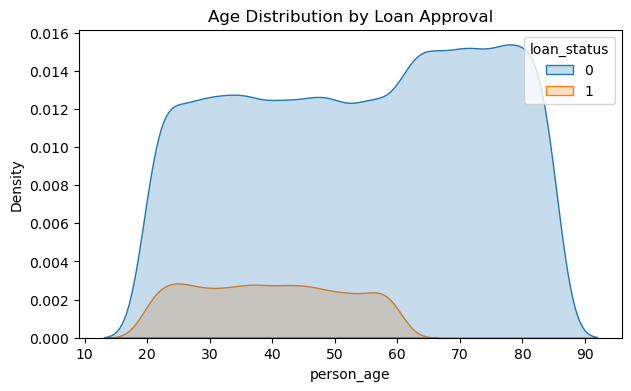

In [2]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='person_age', hue='loan_status', fill=True)
plt.title('Age Distribution by Loan Approval')
plt.show()


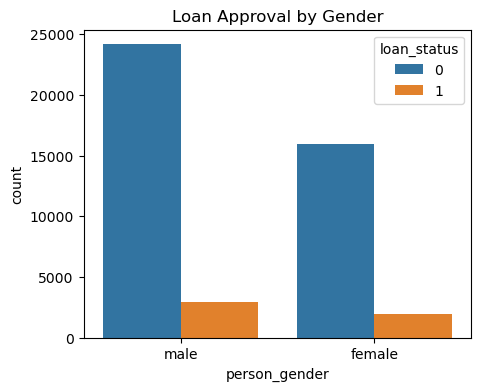

In [3]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='person_gender', hue='loan_status')
plt.title('Loan Approval by Gender')
plt.show()

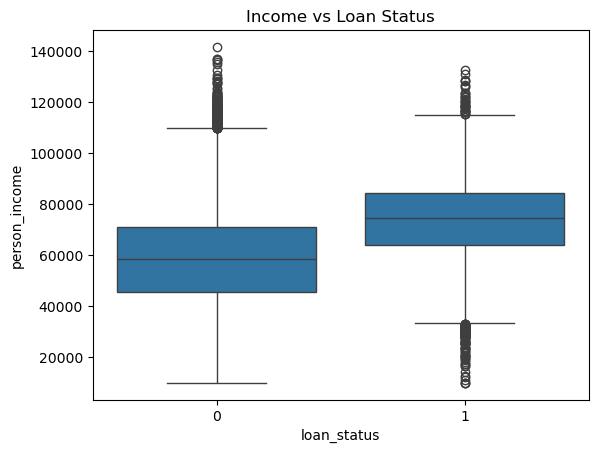

In [4]:
sns.boxplot(data=df, x='loan_status', y='person_income')
plt.title('Income vs Loan Status')
plt.show()


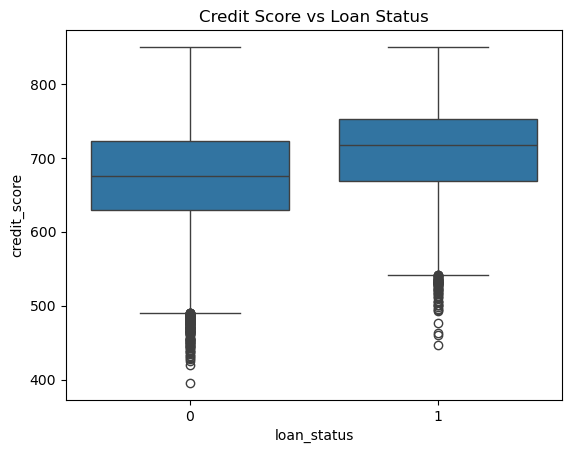

In [5]:
sns.boxplot(data=df, x='loan_status', y='credit_score')
plt.title('Credit Score vs Loan Status')
plt.show()


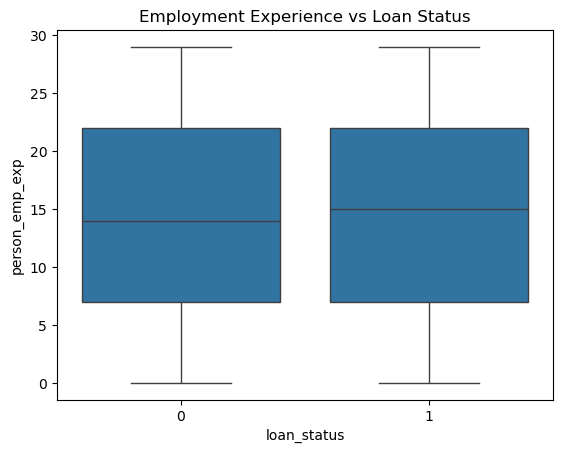

In [6]:
sns.boxplot(data=df, x='loan_status', y='person_emp_exp')
plt.title('Employment Experience vs Loan Status')
plt.show()

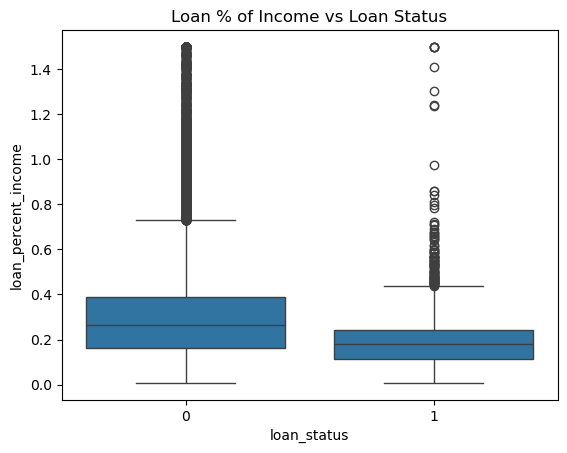

In [7]:
sns.boxplot(data=df, x='loan_status', y='loan_percent_income')
plt.title('Loan % of Income vs Loan Status')
plt.show()


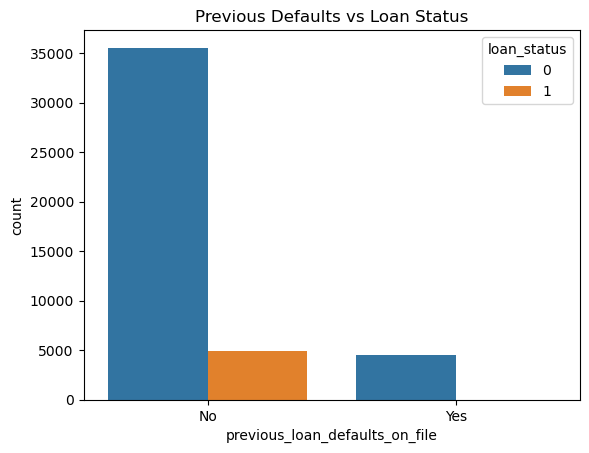

In [8]:
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status')
plt.title('Previous Defaults vs Loan Status')
plt.show()

In [9]:
# Conclusion:
# The data analysis shows that loan approvals are primarily driven by legitimate
# financial risk indicators: credit score, income, and prior defaults. Applicants
# with strong credit histories and higher incomes have the highest approval rates.
#
# The visualizations show minimal gender-based difference in loan decisions,
# but a moderate trend toward approving applicants in mid-age ranges (25–45 years).
# This may be due to greater financial stability, but it should still be reviewed.
#
# Conclusion:
# Overall, the model’s decisions appear economically justified, but the financial
# institution should audit the model for potential indirect bias to ensure full
# compliance with fair-lending laws (such as ECOA and Fair Credit Reporting Act).

In [10]:
# SUMMARY OF FINDINGS
# ============================================================

# Features that drive the model’s decision:
# - Credit Score and Income: Higher values strongly increase the chance of loan approval.
#   The boxplots show that approved applicants generally have higher credit scores
#   and higher annual incomes than rejected ones.
#
# - Loan Percent of Income and Previous Defaults: These features negatively affect approval.
#   Applicants requesting large loans relative to their income, or those with past defaults,
#   are much more likely to be rejected.
#
# - Employment Experience: Shows a mild positive effect. More years of work experience
#   are slightly associated with higher approval likelihood.